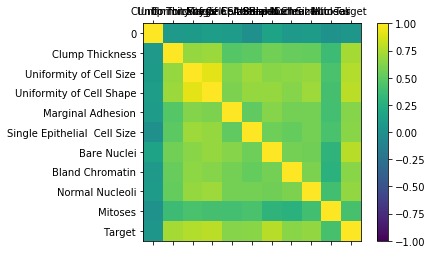

In [2]:
# Correlation Matrix Plot 
from matplotlib import pyplot 
from pandas import read_csv 
import numpy 
filename = 'breast_cancer_data.csv' 
names = ['0','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial  Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Target']
data = read_csv(filename) 
correlations = data.corr() 


# plot correlation matrix 
fig = pyplot.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = numpy.arange(0,11,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 
pyplot.show()

In [3]:
# Normalize data (length of 1) 
from sklearn.preprocessing import Normalizer 
from pandas import read_csv 
from numpy import set_printoptions 
filename = 'breast_cancer_data.csv'   
dataframe = read_csv(filename) 

#dropping of columns
df=dataframe.drop(columns=['0'])
#dropping
dataframe2=df.dropna(how='any')

#check if there's null
dataframe2.isnull().sum()
#print(dataframe2)

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial  Cell Size    0
Bare Nuclei                     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Target                          0
dtype: int64

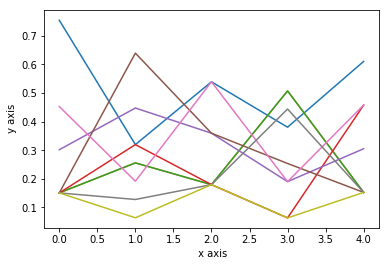

In [5]:
# Normalize data (length of 1) 
import matplotlib.pyplot as plt 
import numpy
from matplotlib import pyplot
from sklearn.preprocessing import Normalizer 
from pandas import read_csv 
from numpy import set_printoptions 
filename = 'breast_cancer_data.csv'   
#dataframe= read_csv(filename) 
array = dataframe2.values 

# separate array into input and output components 
X = array[:,0:9] 
Y = array[:,9] 
scaler = Normalizer().fit(X) 
normalizedX = scaler.transform(X) 

# summarize transformed data 
set_printoptions(precision=3) 
normalizedX[0:5,:]


 
myarray = normalizedX[0:5,:] 
plt.plot(myarray) 
plt.xlabel(' x axis' ) 
plt.ylabel(' y axis' ) 
plt.show()

In [30]:
# Feature Extraction with RFE 
import pandas as pd
from pandas import read_csv 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 

# load data 
array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 

# feature extraction 
model = LogisticRegression() 
rfe = RFE(model, 3) 
fit = rfe.fit(normalizedX, Y) 
print("Num Features: %d" % fit.n_features_) 
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_)
pd.DataFrame(fit.ranking_.reshape(1, 9).tolist(), columns=dataframe2.columns[:-1]).T.sort_values(0, ascending=True)


Num Features: 3
Selected Features: [False  True False False False  True  True False False]
Feature Ranking: [7 1 3 6 2 1 1 4 5]


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

,0
Uniformity of Cell Size,1
Bare Nuclei,1
Bland Chromatin,1
Single Epithelial Cell Size,2
Uniformity of Cell Shape,3
Normal Nucleoli,4
Mitoses,5
Marginal Adhesion,6
Clump Thickness,7


In [7]:
# Feature Importance with Extra Trees Classifier 
from pandas import read_csv 
from sklearn.ensemble import ExtraTreesClassifier 

X = array[:,0:9] 
Y = array[:,9] 

# feature extraction 
model = ExtraTreesClassifier() 
model.fit(normalizedX, Y) 
print(model.feature_importances_)
pd.DataFrame(model.feature_importances_.reshape(1, 9).tolist(), columns=dataframe2.columns[:-1]).T.sort_values(0, ascending=True)

[0.072 0.119 0.139 0.113 0.08  0.153 0.123 0.116 0.086]


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,0
Clump Thickness,0.071717
Single Epithelial Cell Size,0.080108
Mitoses,0.086000
Marginal Adhesion,0.112583
Normal Nucleoli,0.115678
Uniformity of Cell Size,0.118599
Bland Chromatin,0.123360
Uniformity of Cell Shape,0.139090
Bare Nuclei,0.152865


In [8]:
# Evaluate using a train and a test set 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
test_size = 0.33 
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression() 
model.fit(X_train, Y_train) 
result = model.score(X_test, Y_test) 
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 93.939%


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# Evaluate using Cross Validation 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=50, random_state=7) 
model = LogisticRegression() 
results = cross_val_score(model, X, Y, cv=kfold) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.333% (8.570%)


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [39]:
# Evaluate using Leave One Out Cross Validation 
from pandas import read_csv 
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
loocv = LeaveOneOut() 
model = LogisticRegression() 
results = cross_val_score(model, X, Y, cv=loocv) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Accuracy: 94.333% (23.120%)


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [40]:
# Cross Validation Classification Report 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
test_size = 0.33 
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression() 
model.fit(X_train, Y_train) 
predicted = model.predict(X_test) 
report = classification_report(Y_test, predicted) 
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.93      0.93      0.93        40

   micro avg       0.94      0.94      0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
# KNN Classification
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=50, random_state=7) 
model = KNeighborsClassifier() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9600000000000002


In [51]:
# Gaussian Naive Bayes Classification 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=50, random_state=7) 
model = GaussianNB() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9433333333333335


In [57]:
# CART Classification 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = DecisionTreeClassifier() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9166666666666666


In [62]:
# SVM Classification 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=15, random_state=7) 
model = SVC() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9433333333333332


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

In [64]:
# Linear Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = LinearRegression() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.05620824718045334


In [17]:
# Ridge Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Ridge 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = Ridge() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.05619668581093319


In [18]:
# Lasso Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Lasso 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9]
kfold = KFold(n_splits=10, random_state=7) 
model = Lasso() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.1681924939320162


In [19]:
# ElasticNet Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import ElasticNet 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = ElasticNet() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.0917788781901338


In [20]:
# KNN Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = KNeighborsRegressor() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.04320000000000001


In [21]:
# Decision Tree Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = DecisionTreeRegressor() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.08333333333333334


In [22]:
# SVM Regression 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVR 

array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 
kfold = KFold(n_splits=10, random_state=7) 
model = SVR() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-0.06175825973705995


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

 LR: 0.940000 (0.051208)
 LDA: 0.930000 (0.056667)
 KNN: 0.960000 (0.032660)
 CART: 0.936667 (0.034801)
 NB: 0.940000 (0.041633)
 SVM: 0.933333 (0.033333)


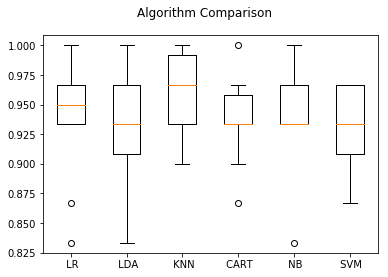

In [87]:
# Compare Algorithms 
from pandas import read_csv 
from matplotlib import pyplot 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 


array = dataframe2.values 
X = array[:,0:9] 
Y = array[:,9] 

# prepare models 
models = [] 
models.append((' LR' , LogisticRegression())) 
models.append((' LDA' , LinearDiscriminantAnalysis())) 
models.append((' KNN' , KNeighborsClassifier())) 
models.append((' CART' , DecisionTreeClassifier())) 
models.append((' NB' , GaussianNB())) 
models.append((' SVM' , SVC()))

# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy' 
for name, model in models: 
    kfold = KFold(n_splits=10,random_state=12) 
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
# boxplot algorithm comparison 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [112]:
# Create a pipeline that extracts features from the data then creates a model 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import FeatureUnion 
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 

X = array[:,0:9] 
Y = array[:,9] 

# create feature union 
features = [] 
features.append(('pca' , PCA(n_components=3))) 
features.append(('select_best' , SelectKBest(k=6))) 
feature_union = FeatureUnion(features) 

# create pipeline 
estimators = [] 
estimators.append(('feature_union' , feature_union)) 
estimators.append(('logistic' , LogisticRegression())) 
model = Pipeline(estimators)

# evaluate pipeline 
kfold = KFold(n_splits=12, random_state=7) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9566666666666667


C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nojor\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [117]:
# Bagged Decision Trees for Classification 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

X = array[:,0:9] 
Y = array[:,9] 
seed = 10 
kfold = KFold(n_splits=10, random_state=seed) 
cart = DecisionTreeClassifier() 
num_trees = 100 
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9433333333333334


In [119]:
# Random Forest Classification 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier 

X = array[:,0:9] 
Y = array[:,9] 
num_trees = 100 
max_features = 3 
kfold = KFold(n_splits=10, random_state=7) 
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.95


In [94]:
# Extra Trees Classification 
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier 

X = array[:,0:9] 
Y = array[:,9] 
num_trees = 100 
max_features = 7 
kfold = KFold(n_splits=10, random_state=7) 
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.9533333333333334
